In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
from datetime import datetime
from os import path
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from cafeen import utils
mpl.style.use('ggplot')

In [8]:
path_to_train = path.join(path.abspath('..'), 'data', 'train.csv')
path_to_test = path.join(path.abspath('..'), 'data', 'test.csv')

In [45]:
train = pd.read_csv(path_to_train)
train['ord_5'] = train['ord_5'].str[0]
train.loc[train['ord_5'].isna(), 'ord_5'] = np.nan

In [46]:
test = pd.read_csv(path_to_test)

In [47]:
df, _ = utils.read_data()

In [48]:
summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
summary = summary.reset_index()
summary['Name'] = summary['index']
summary = summary[['Name','dtypes']]
summary['Missing'] = df.isnull().sum().values    
summary['Uniques'] = df.nunique().values
summary['First Value'] = df.iloc[0].values
summary['Second Value'] = df.iloc[1].values
summary['Third Value'] = df.iloc[2].values

for name in summary['Name'].value_counts().index:
    summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 
summary.style.background_gradient(cmap='Pastel1')

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,id,int64,0,1000000,0,1,2,19.93
1,bin_0,float64,29795,2,0,1,0,0.45
2,bin_1,float64,30041,2,0,1,1,0.69
3,bin_2,float64,29902,2,0,0,0,0.85
4,bin_3,object,29965,2,F,F,F,0.95
5,bin_4,object,29998,2,N,Y,N,1
6,nom_0,object,30314,3,Red,Red,Red,1.31
7,nom_1,object,30103,6,Trapezoid,Star,nan,2.27
8,nom_2,object,30214,6,Hamster,Axolotl,Hamster,2.27
9,nom_3,object,30297,6,Russia,nan,Canada,2.27


In [49]:
features = utils.get_features(train.columns)

prob = []

for feature in features:
    count = train[feature].isna().sum()
    p = train.loc[train[feature].isna()]['target'].mean()
    prob += [p]
    print(f'{feature}: {count}, {p:.5f}')
print(f"total: {train['target'].mean():.5f}, {np.mean(prob):.5f}")

bin_0: 17894, 0.18839
bin_1: 18003, 0.18841
bin_2: 17930, 0.18622
bin_3: 18014, 0.18808
bin_4: 18047, 0.18685
nom_0: 18252, 0.18529
nom_1: 18156, 0.18280
nom_2: 18035, 0.18658
nom_3: 18121, 0.18586
nom_4: 18035, 0.18553
nom_5: 17778, 0.18174
nom_6: 18131, 0.18543
nom_7: 18003, 0.18575
nom_8: 17755, 0.19178
nom_9: 18073, 0.18785
ord_0: 18288, 0.18706
ord_1: 18041, 0.18741
ord_2: 18075, 0.18661
ord_3: 17916, 0.18821
ord_4: 17930, 0.18901
ord_5: 17713, 0.18421
day: 17952, 0.17853
month: 17988, 0.18635
total: 0.18721, 0.18626


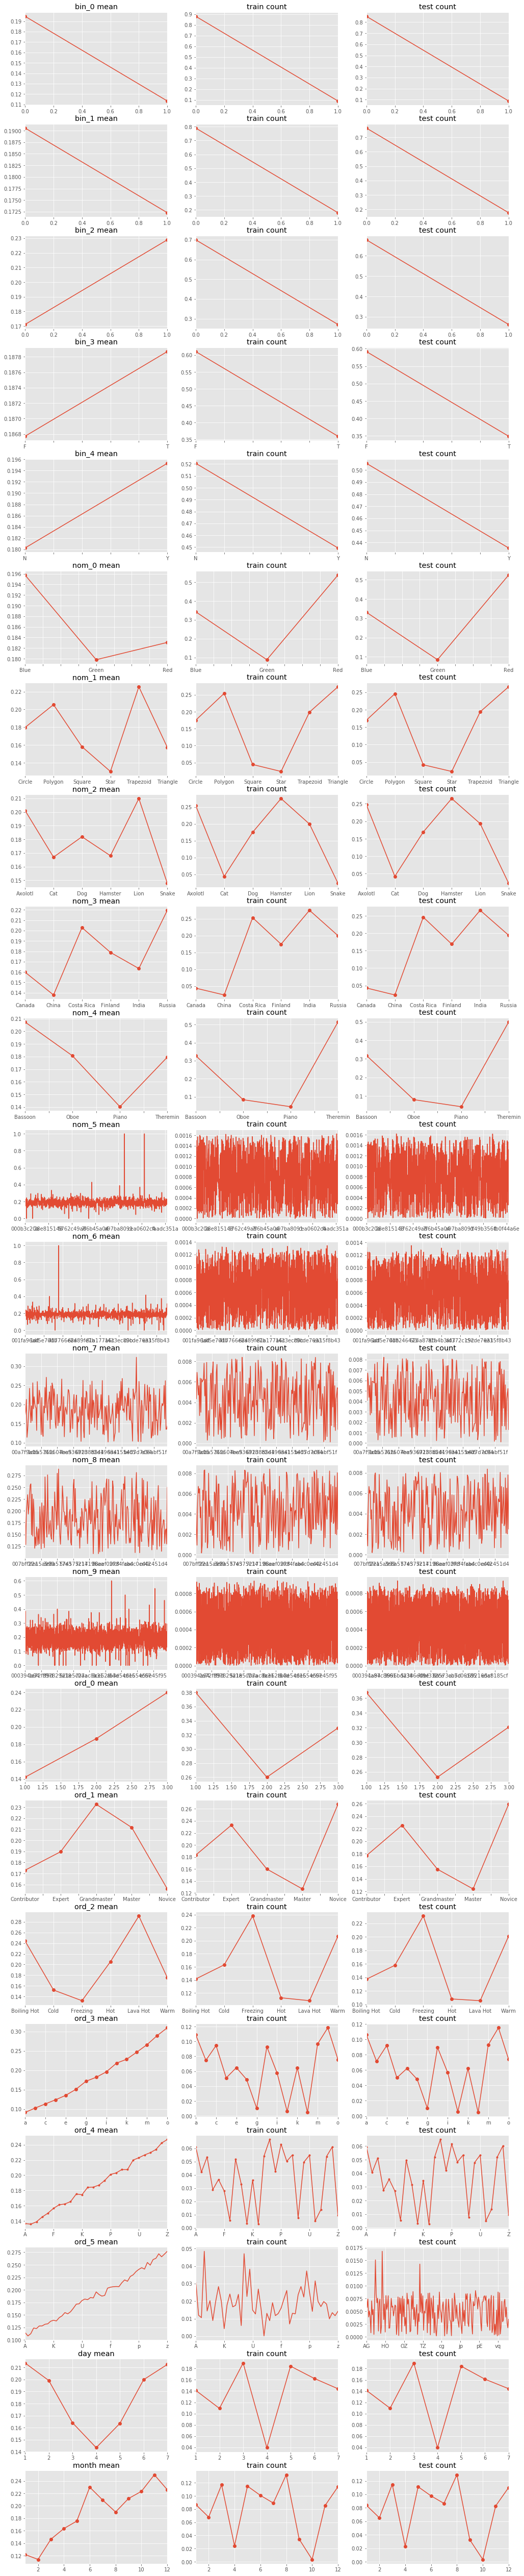

In [50]:
features = [col for col in test.columns if col not in ['id']]
nrows = len(features)
ncols = 3

fig, ax = plt.subplots(nrows, ncols, figsize=(17,4*nrows))

for i in range(nrows):
    if train[features[i]].nunique() <= 15:
        marker = 'o'
    elif train[features[i]].nunique() <= 50:
        marker = '.'
    else:
        marker = None
        
    train_counts = train.groupby(features[i])['target'].count() / len(train)
    test_counts = test.groupby(features[i])['day'].count() / len(test)
    
    train.groupby(features[i])['target'].mean().plot(ax=ax[i, 0], marker=marker)
    train_counts.plot(ax=ax[i, 1], marker=marker)
    test_counts.plot(ax=ax[i, 2], marker=marker)
    ax[i, 0].set_title(features[i] + ' mean')
    ax[i, 1].set_title('train count')
    ax[i, 2].set_title('test count')
    
    for j in range(ncols):
        ax[i, j].set_xlabel('')

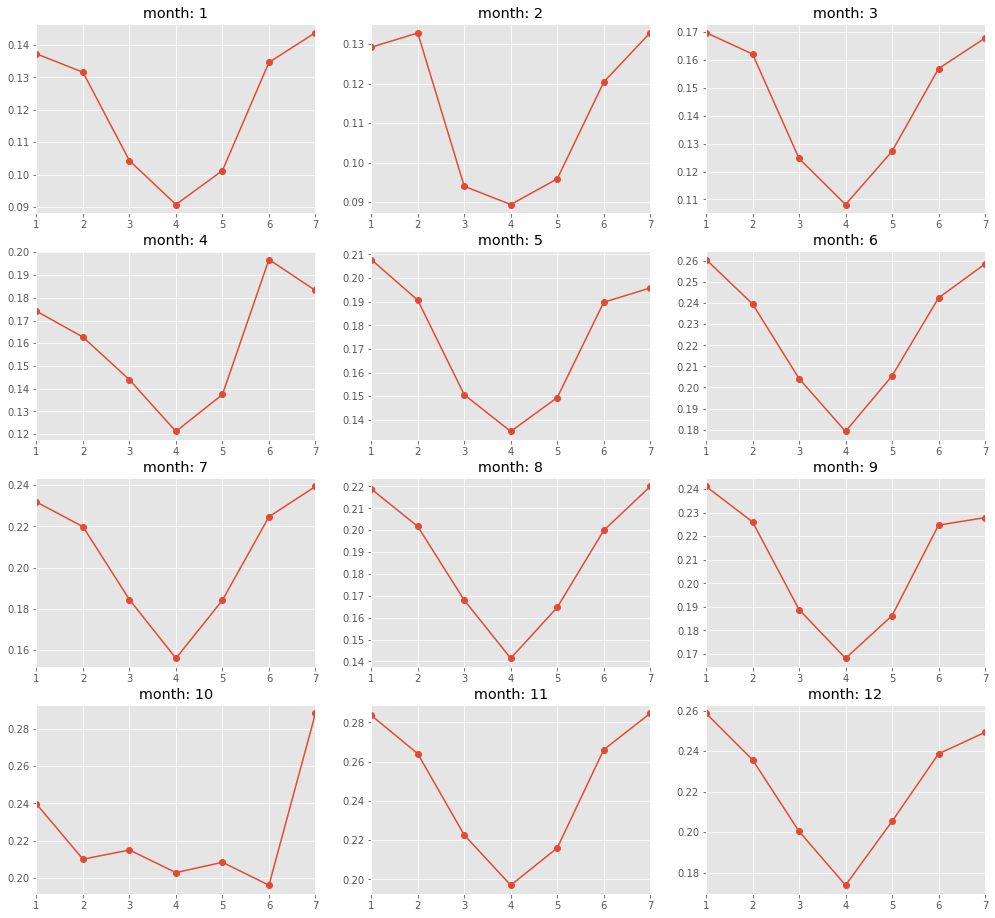

In [51]:
fig, ax = plt.subplots(4, 3, figsize=(17,16))

for i in range(12):
    train[train['month'] == i+1].groupby('day')['target'].mean().plot(ax = ax[i//3, i-3*(i//3)], marker='o')
    ax[i//3, i-3*(i//3)].set_xlabel('')
    ax[i//3, i-3*(i//3)].set_title(f'month: {i+1}')

In [17]:
df.loc[(df['month'] == 2) & (df['day'] == 2), 'day'] = 6
df.loc[(df['month'] == 4) & (df['day'] == 6), 'day'] = 7
df.loc[(df['month'] == 5) & (df['day'] == 7), 'day'] = 1
df.loc[(df['month'] == 10) & (df['day'] == 2), 'day'] = 1
df.loc[(df['month'] == 10) & (df['day'] == 6), 'day'] = 1
df.loc[(df['month'] == 10) & (df['day'] == 7), 'day'] = 1

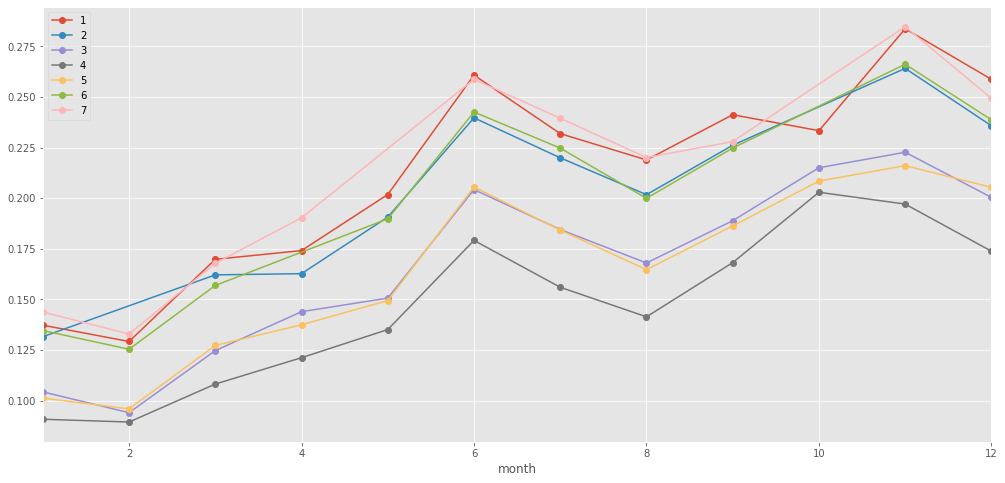

In [20]:
train, _ = utils.split_data(df)

fig, ax = plt.subplots(1, 1, figsize=(17,8))

for i in range(7):
    train[train['day'] == i+1].groupby('month')['target'].mean().plot(marker='o')
#    train[train['day'] == i+1].groupby('month')['target'].mean().plot(ax = ax[i//3, i-3*(i//3)], marker='o')
#    ax[i//3, i-3*(i//3)].set_xlabel('')
#    ax[i//3, i-3*(i//3)].set_title(f'month: {i+1}')
ax.legend([1,2,3,4,5,6,7])

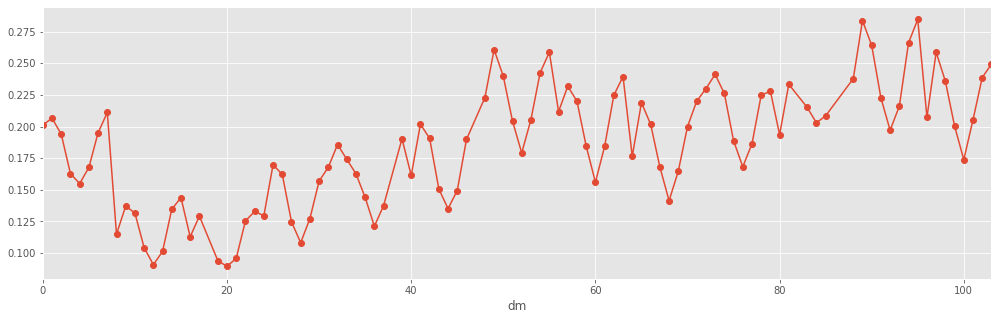

In [22]:
df.loc[(df['month'] == 2) & (df['day'] == 2), 'day'] = 6
df.loc[(df['month'] == 4) & (df['day'] == 6), 'day'] = 7
df.loc[(df['month'] == 5) & (df['day'] == 7), 'day'] = 1
df.loc[(df['month'] == 10) & (df['day'] == 2), 'day'] = 1
df.loc[(df['month'] == 10) & (df['day'] == 6), 'day'] = 1
df.loc[(df['month'] == 10) & (df['day'] == 7), 'day'] = 1
df.loc[df['month'].isna(), 'month'] = 0
df.loc[df['day'].isna(), 'day'] = 0
df['dm'] = 8 * df['month'] + df['day']

train, _ = utils.split_data(df)

fig, ax = plt.subplots(1, 1, figsize=(17,5))
train.groupby('dm')['target'].mean().plot(marker='o')

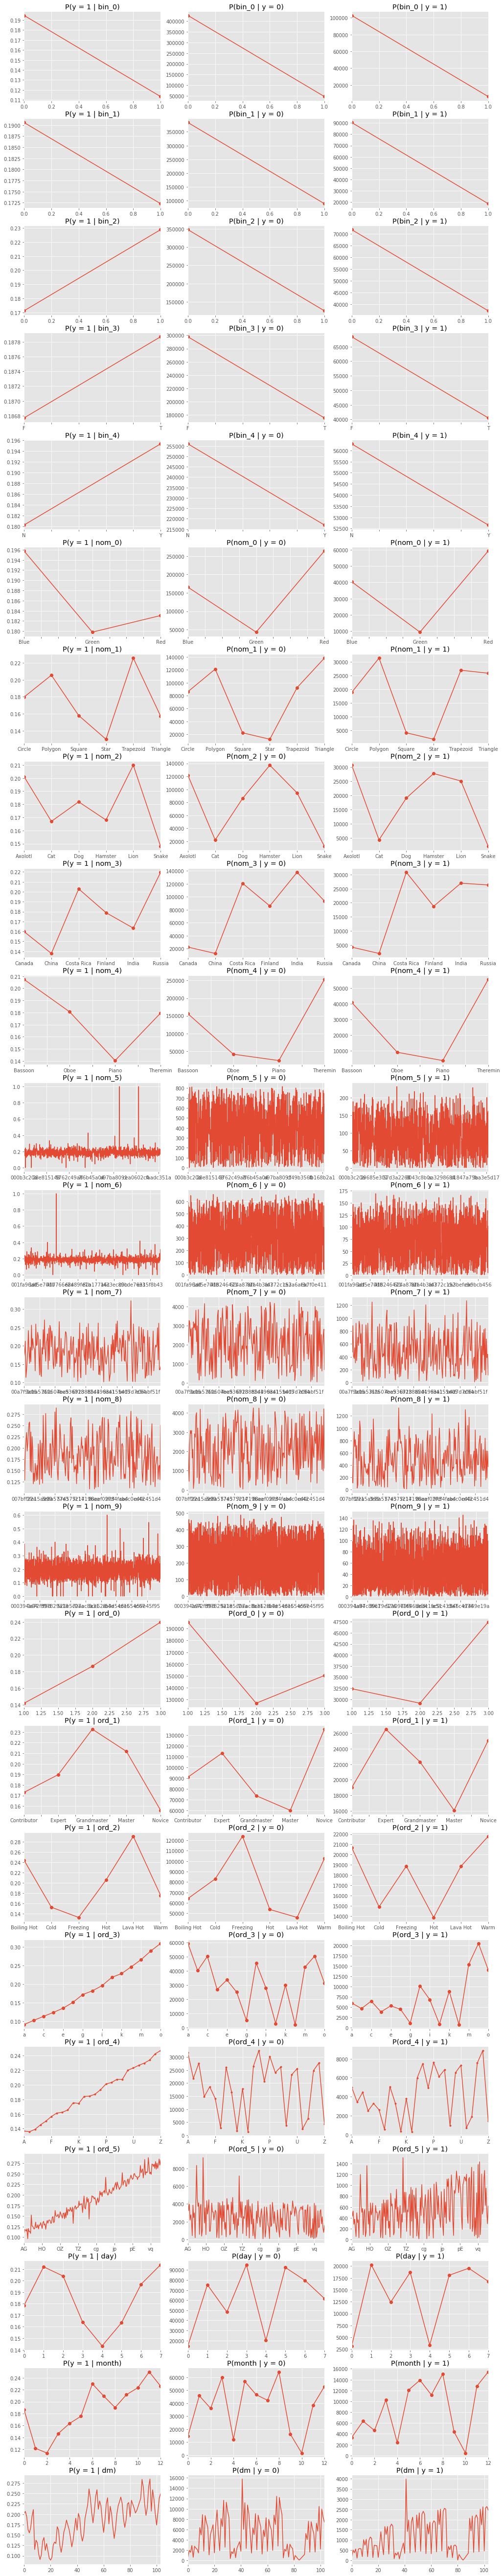

In [31]:
features = utils.get_features(train.columns)
nrows = len(features)
ncols = 3

fig, ax = plt.subplots(nrows, ncols, figsize=(17,4*nrows))
class_0 = train['target'] == 0
class_1 = train['target'] == 1

for i in range(nrows):
    if train[features[i]].nunique() <= 15:
        marker = 'o'
    elif train[features[i]].nunique() <= 50:
        marker = '.'
    else:
        marker = None
        
    p = train.groupby(features[i])['target'].mean()
    counts_0 = train[class_0].groupby(features[i]).size()
    counts_1 = train[class_1].groupby(features[i]).size()
    
    p.plot(ax=ax[i, 0], marker=marker)
    (counts_0).plot(ax=ax[i, 1], marker=marker)
    (counts_1).plot(ax=ax[i, 2], marker=marker)
    ax[i, 0].set_title(f'P(y = 1 | {features[i]})')
    ax[i, 1].set_title(f'P({features[i]} | y = 0)')
    ax[i, 2].set_title(f'P({features[i]} | y = 1)')
    
    for j in range(ncols):
        ax[i, j].set_xlabel('')